# Iteration 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Understanding

In [2]:
df1 = pd.read_csv('set15_it1_final.csv')

In [3]:
df2 = pd.read_csv('set15_it2.csv')

In [4]:
df1

,Unnamed: 0,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


In [5]:
df2

,DI,StructuralIntegrity,ExteriorCharm
0,0,4,Common
1,1,8,Common
2,2,5,Common
3,3,6,Common
4,4,6,Common
...,...,...,...
2358,2335,5,Gleaming
2359,2336,6,Common
2360,2337,6,Common
2361,2338,7,Common


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


In [7]:
df2.describe()

,DI,StructuralIntegrity
count,2363.000000,2363.000000
mean,1169.813796,5.563690
std,675.447687,1.103678
min,0.000000,1.000000
25%,584.500000,5.000000
50%,1170.000000,5.000000
75%,1753.500000,6.000000
max,2339.000000,9.000000


In [8]:
df2.sample(5)

,DI,StructuralIntegrity,ExteriorCharm
556,550,6,Common
1128,1118,5,Common
227,226,5,Gleaming
1498,1483,6,Common
2126,2106,5,Common


In [9]:
df2.isna().sum()

DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64

In [10]:
df2['ExteriorCharm'].value_counts()

ExteriorCharm
Common        1446
Gleaming       794
Enchanting      96
Modest          27
Name: count, dtype: int64

In [11]:
df2['StructuralIntegrity'].value_counts()

StructuralIntegrity
5    1349
6     421
7     307
8     118
4      82
3      41
9      35
2       7
1       3
Name: count, dtype: int64

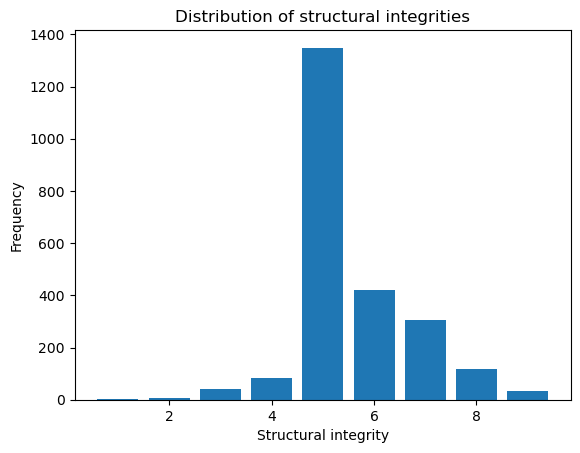

In [12]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], height=[3, 7, 41, 82, 1349, 421, 307, 118, 35])
plt.title('Distribution of structural integrities')
plt.xlabel('Structural integrity')
plt.ylabel('Frequency')
plt.show()

In [13]:
df2.loc[df2.duplicated()]

,DI,StructuralIntegrity,ExteriorCharm
61,60,6,Common
309,307,7,Common
391,388,7,Common
509,505,6,Common
522,517,5,Common
526,520,7,Common
599,592,5,Gleaming
660,652,6,Common
991,982,7,Common
1012,1002,5,Gleaming


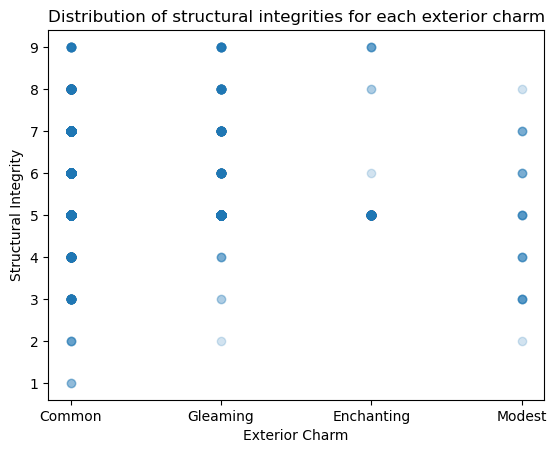

In [14]:
plt.scatter(df2['ExteriorCharm'], df2['StructuralIntegrity'], alpha=0.2)
plt.title('Distribution of structural integrities for each exterior charm')
plt.xlabel('Exterior Charm')
plt.ylabel('Structural Integrity')
plt.show()

This should give a nice general idea of how the data is distributed

## 2. Data Preparation

Since the left dataset (one from iteration 1) has already gone through data prep and has had its duplicates deleted, now having a different number of rows than the new dataset, we do a left join on its IDs .

In [15]:
df = df1.merge(df2, left_index=True, right_index=True, how="left")

In [16]:
df

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft,0,4,Common
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft,1,8,Common
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft,2,5,Common
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft,3,6,Common
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft,4,6,Common
...,...,...,...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft,2310,5,Gleaming
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft,2311,5,Common
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft,2312,5,Common
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft,2313,6,Common


In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df.drop(columns=['DI_y'], inplace=True)

In [19]:
df.rename(columns={'DI_x' : 'DI'}, inplace=True)

In [20]:
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft,4,Common


Since the ParcelSizeUnit column is all just sqft, that column can be deleted and instead ParcelSize should be renamed to clarify that it's in sqft

In [21]:
df.drop(columns=['ParcelSizeUnit'], inplace=True)

In [22]:
df.head()

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,4,Common
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,8,Common
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,5,Common
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,6,Common
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,6,Common


In [23]:
df.rename(columns={'ParcelSize' : 'ParcelSize (sqft)'}, inplace=True)

In [24]:
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,4,Common


In [25]:
monthly_income = 2500

In [26]:
df['MonthlyPayment'] = ((df['TradeValue'] - (df['TradeValue'] * 0.2)) * (1/300) * (1 + (1/300)) ** 360) / ((1 + (1/300)) ** 360 - 1)

In [27]:
df.sample(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment
885,886,245000.0,Meadowlands,Wyverncliff,1101.0,9139.0,5,Gleaming,935.733979
1297,1299,325000.0,GnomeBurough,Petalbridge,2134.0,13500.0,5,Gleaming,1241.279768
689,690,235000.0,Meadowlands,Sunspire,1402.0,12192.0,5,Common,897.540755
1955,1957,360000.0,Meadowlands,Silverglen,1115.0,12378.0,9,Gleaming,1374.956051
1116,1118,165500.0,Meadowlands,Dragonspire,1307.0,10552.0,5,Gleaming,632.097851


In [28]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,5.564585,693.313267
std,675.842382,80164.061659,377.971615,7126.006466,1.105235,306.172393
min,0.000000,12789.000000,256.000000,1470.000000,1.000000,48.845314
25%,584.250000,129925.000000,883.000000,7427.750000,5.000000,496.225458
50%,1170.500000,160350.000000,1115.000000,9375.000000,5.000000,612.428341
75%,1754.750000,213000.000000,1326.000000,11509.000000,6.000000,813.515663
max,2339.000000,625000.000000,4339.000000,164660.000000,9.000000,2387.076477


In [29]:
df['AffordableDwelling'] = df['MonthlyPayment'] <= (monthly_income * 0.3)

In [30]:
df.sample(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling
1541,1543,178000.0,GnomeBurough,Petalbridge,1262.0,9600.0,8,Common,679.839381,True
267,267,189000.0,Meadowlands,Sunspire,1119.0,8199.0,6,Common,721.851927,True
649,650,114000.0,Meadowlands,Shadowmere,998.0,11200.0,5,Gleaming,435.402749,True
1848,1850,135000.0,Meadowlands,Dragonspire,1435.0,9482.0,7,Gleaming,515.608519,True
1101,1103,203000.0,Meadowlands,Sunspire,979.0,8814.0,6,Common,775.322440,False


In [31]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,5.564585,693.313267
std,675.842382,80164.061659,377.971615,7126.006466,1.105235,306.172393
min,0.000000,12789.000000,256.000000,1470.000000,1.000000,48.845314
25%,584.250000,129925.000000,883.000000,7427.750000,5.000000,496.225458
50%,1170.500000,160350.000000,1115.000000,9375.000000,5.000000,612.428341
75%,1754.750000,213000.000000,1326.000000,11509.000000,6.000000,813.515663
max,2339.000000,625000.000000,4339.000000,164660.000000,9.000000,2387.076477


In [32]:
df["AffordableDwelling"].value_counts()

AffordableDwelling
True     1624
False     714
Name: count, dtype: int64

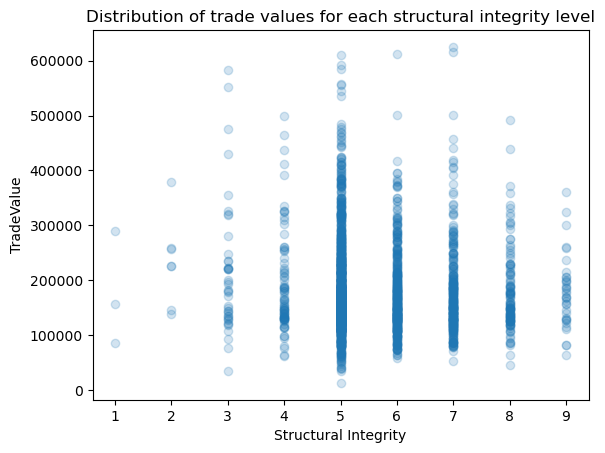

In [33]:
plt.scatter(df['StructuralIntegrity'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of trade values for each structural integrity level')
plt.xlabel('Structural Integrity')
plt.ylabel('TradeValue')
plt.show()

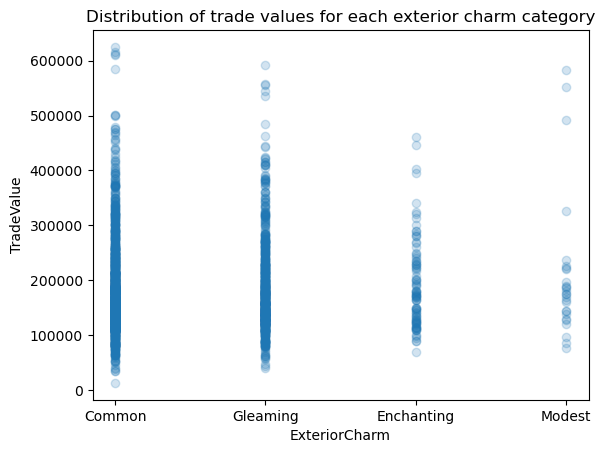

In [34]:
plt.scatter(df['ExteriorCharm'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of trade values for each exterior charm category')
plt.xlabel('ExteriorCharm')
plt.ylabel('TradeValue')
plt.show()

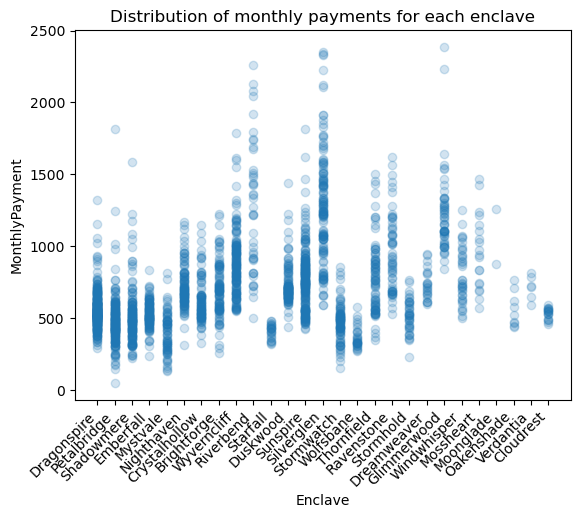

In [35]:
plt.scatter(df['Enclave'], df['MonthlyPayment'], alpha=0.2)
plt.title('Distribution of monthly payments for each enclave')
plt.xlabel('Enclave')
plt.ylabel('MonthlyPayment')
plt.xticks(ha='right', rotation=45)
plt.show()

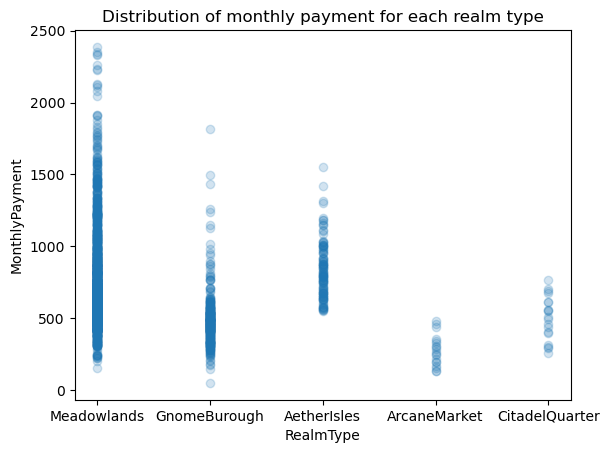

In [36]:
plt.scatter(df['RealmType'], df['MonthlyPayment'], alpha=0.2)
plt.title('Distribution of monthly payment for each realm type')
plt.xlabel('RealmType')
plt.ylabel('MonthlyPayment')
plt.show()

## 3. Modelling

### 3.1 Creating the train test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling
0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,4,Common,570.988693,True
1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,8,Common,401.028848,True
2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,5,Common,302.776780,True
3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,6,Common,534.705131,True
4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,6,Common,576.370119,True
...,...,...,...,...,...,...,...,...,...,...
2333,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,5,Gleaming,704.664976,True
2334,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,5,Common,802.057696,False
2335,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,5,Common,853.618548,False
2336,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,6,Common,496.129975,True


In [39]:
# target is called y a lot in documentation
target = df['AffordableDwelling']

# features is called X a lot in documentation
features = df[['Enclave', 'RealmType']]

# random_state to get reproduceable results
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=3)

Checking the lenght of the train and test sets

In [40]:
print('The length of y_train is:', len(target_train))
print('The length of y_test is:', len(target_test))

The length of y_train is: 1753
The length of y_test is: 585


### 3.2 Creating the benchmark classification model

First, we check the most occuring value for the AffordableDwelling column

In [41]:
df['AffordableDwelling'].value_counts()

AffordableDwelling
True     1624
False     714
Name: count, dtype: int64

Then we create our benchmark predictions

In [42]:
value = 1

pred_train = [value] * len(target_train)

pred_test = [value] * len(target_test)


In [43]:
print('The length of y_train is:', len(pred_train))
print('The length of y_test is:', len(pred_test))

The length of y_train is: 1753
The length of y_test is: 585


We calculate the accuracy score for the benchmark predictions

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy train set:', accuracy_score(pred_train, target_train))
print('Accuracy test set:', accuracy_score(pred_test, target_test))

Accuracy train set: 0.6908157444381061
Accuracy test set: 0.705982905982906


In [45]:
def classification_model(row):
    if (row['RealmType'] == "ArcaneMarket" or row['RealmType'] == "CitadelQuarter"):
        prediction = 1
    else:
        if (row['Enclave'] == "Glimmerwood" or row['Enclave'] == "Wyverncliff" or row['Enclave'] == "Riverband" or row['Enclave'] == "Silverglen" or row['Enclave'] == "Ravenstone" or row['Enclave'] == "Thornfield"):
            prediction = 0
        else:
            prediction = 1
        
    return prediction

Now we can add a prediction column to the dataset. 

In [46]:
df['Prediction'] = df.apply(lambda row: classification_model(row), axis=1)

In [47]:
feature_train['Prediction'] = feature_train.apply(lambda row: classification_model(row), axis=1)
feature_test['Prediction'] = feature_test.apply(lambda row: classification_model(row), axis=1)

We calculate the accuracy scores for the classification model we created.

In [48]:
print('Accuracy train set:', accuracy_score(target_train, feature_train['Prediction']))
print('Accuracy test set:', accuracy_score(target_test, feature_test['Prediction']))

Accuracy train set: 0.8083285795778665
Accuracy test set: 0.8034188034188035


## 4. Evaluation

### 4.1 Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(target_test, feature_test['Prediction'])

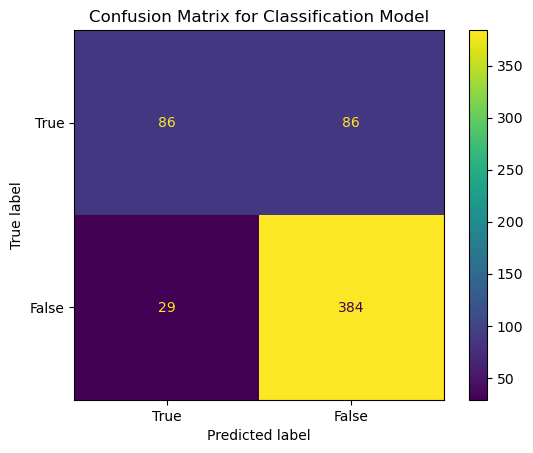

In [51]:
labels = ['True','False']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix for Classification Model')
plt.show()

In [52]:
df.to_csv('set15_it2_final.csv')